In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy.linalg
import itertools

In [2]:
'''
1. top-left-square: {x,o,b}
2. top-middle-square: {x,o,b}
3. top-right-square: {x,o,b}
4. middle-left-square: {x,o,b}
5. middle-middle-square: {x,o,b}
6. middle-right-square: {x,o,b}
7. bottom-left-square: {x,o,b}
8. bottom-middle-square: {x,o,b}
9. bottom-right-square: {x,o,b}
10. Class: {positive,negative}
'''

df = pd.read_csv('/content/tic-tac-toe.csv')
df.columns

Index(['x', 'x.1', 'x.2', 'x.3', 'o', 'o.1', 'x.4', 'o.2', 'o.3', 'positive'], dtype='object')

In [3]:
df = df.rename(columns={'x': 'top-left', 'x.1': 'top-middle', 'x.2': 'top-right',
                   'x.3': 'middle-left', 'o': 'middle-middle', 'o.1': 'middle-right',
                   'x.4': 'bottom-left', 'o.2': 'bottom-middle', 'o.3': 'bottom-right'})
df = df.reset_index(drop = True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957 entries, 0 to 956
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   top-left       957 non-null    object
 1   top-middle     957 non-null    object
 2   top-right      957 non-null    object
 3   middle-left    957 non-null    object
 4   middle-middle  957 non-null    object
 5   middle-right   957 non-null    object
 6   bottom-left    957 non-null    object
 7   bottom-middle  957 non-null    object
 8   bottom-right   957 non-null    object
 9   positive       957 non-null    object
dtypes: object(10)
memory usage: 74.9+ KB


In [5]:
df.positive = df.positive.map({'positive': 1, 'negative': 0})

In [6]:
l1 = list(df.columns[:-1]) #explanatory variables
l2 = ['category']*9 
l3 = dict(zip(l1, l2))
df = df.astype(l3)

In [7]:
df.columns

Index(['top-left', 'top-middle', 'top-right', 'middle-left', 'middle-middle',
       'middle-right', 'bottom-left', 'bottom-middle', 'bottom-right',
       'positive'],
      dtype='object')

In [8]:
#feature extraction

df['n_x'] = df.isin(['x']).sum(axis=1)
df['n_o'] = df.isin(['o']).sum(axis=1)
df['n_b'] = df.isin(['b']).sum(axis=1)

In [9]:
!pip install pandas-profiling==2.7.1
from pandas_profiling import ProfileReport
profile = ProfileReport(df)

In [10]:
profile

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [54]:
profile.to_notebook_iframe()
profile.to_file("Classification_Report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
one_hot = pd.get_dummies(df[l1])
df = df.drop( l1, axis = 1)
df = df.join(one_hot)
df

,positive,n_x,n_o,n_b,top-left_b,top-left_o,top-left_x,top-middle_b,top-middle_o,top-middle_x,top-right_b,top-right_o,top-right_x,middle-left_b,middle-left_o,middle-left_x,middle-middle_b,middle-middle_o,middle-middle_x,middle-right_b,middle-right_o,middle-right_x,bottom-left_b,bottom-left_o,bottom-left_x,bottom-middle_b,bottom-middle_o,bottom-middle_x,bottom-right_b,bottom-right_o,bottom-right_x
0,1,5,4,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0
1,1,5,4,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
2,1,4,3,2,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0
3,1,4,3,2,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0
4,1,4,3,2,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,0,5,4,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1
953,0,5,4,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
954,0,5,4,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1
955,0,5,4,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [12]:
D = df.shape[1]
features = list(range(D))[1:]
X = df.iloc[:, features]
Y = df.iloc[:, [0]]

In [13]:
def split_train_test(data, test_ratio):
    np.random.seed(43)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(df, 0.2)

In [14]:
X_train = train_set.iloc[:, features].reset_index(drop = True)
Y_train = train_set.iloc[:, [0]].reset_index(drop = True)
X_test = test_set.iloc[:, features].reset_index(drop = True)
Y_test = test_set.iloc[:, [0]].reset_index(drop = True)

# The Least Square Classification Method

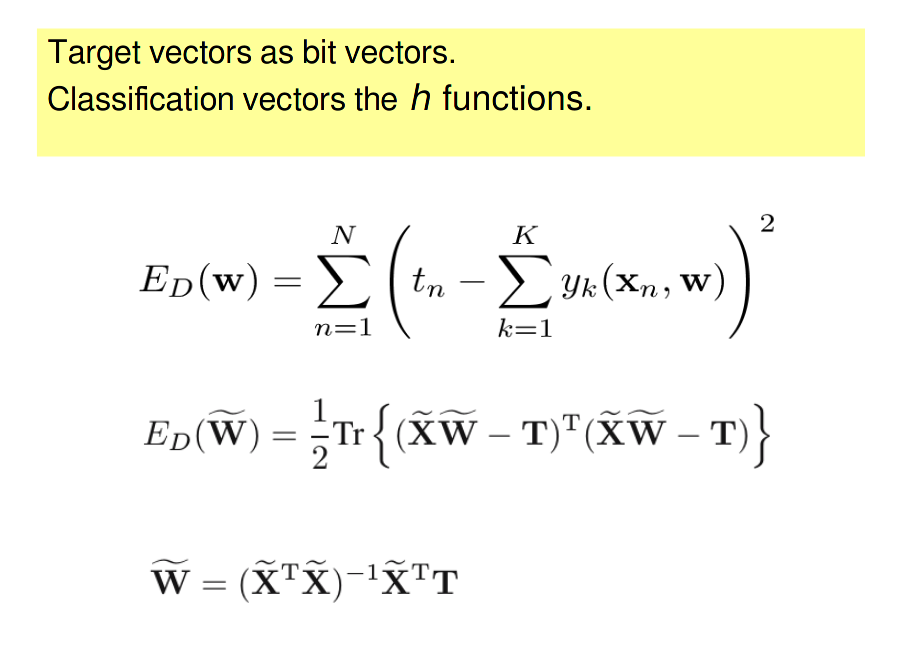

In [15]:
def train(x,y):
    """
		Build the linear least weight vector W
		:param x: N x D matrix containing N attributes vectors for training
		:param y: N x 1 matrix containing N class vectors for training
	"""

    n = x.shape[0]
    # d = Number of features
    d = x.shape[1]
    x_new = np.concatenate((np.ones((n,1)), x), axis = 1)

    xtx = np.dot(x_new.T,x_new)
    xty = np.dot(x_new.T,y)
    # Return weight vector
    w = np.dot(np.linalg.inv(xtx),xty)
    return w

In [16]:
def predict(w, x):
    """
    Predict the class y of a single set of attributes
    :param W:	d+1 x 1  Least squares weight matrix
    :param x:	n x d matrix of attributes for testing
    :return:	List of 0's and 1's.
    """
    n, d = x.shape
    x_new = np.concatenate((np.ones((n,1)), x), axis = 1)		# augment test vector

    # Solve w.transpose * x
    y_pred = 1 - np.dot(x_new, w)
    y_pred[y_pred >= 0.5] = 1
    y_pred[y_pred < 0.5] = 0
    return y_pred

In [17]:
W = train(X_train, Y_train)

Y_pred_ls_train = predict(W, X_train)
Y_pred_ls_test = predict(W, X_test)

We usually test the algorithm and its performance by evaluating these 4 metrics that are listed below.
*   precision = TP / (TP + FP)
*   recall = TP / (TP + FN)
*   F-Score = (2 * precision * recall) / (precision + recall)
*   accuracy = (TP + TN) / (TP + TN + FP + FN)   



In [18]:
def metrics(df):
    precision = df.iloc[1,1] / (df.iloc[1,1] + df.iloc[0,1])
    recall = df.iloc[1,1] / (df.iloc[1,1] + df.iloc[1,0])
    f_score = (2 * precision * recall) / (precision + recall)
    accuracy = (df.iloc[1,1] + df.iloc[0,0]) / (df.iloc[0,0] + df.iloc[0,1] + df.iloc[1,0] + df.iloc[1,1])
    print('precision:', precision)
    print('recall:', recall)
    print('f_score:', f_score)
    print('accuracy:', accuracy)
    return [precision, recall, f_score, accuracy]

In [19]:
y_actu1 = pd.Series(Y_train.to_numpy().flatten(), name='Actual')
y_pred1 = pd.Series(Y_pred_ls_train.flatten(), name='Predicted')
df_confusion1 = pd.crosstab(y_actu1, y_pred1)
df_confusion1

Predicted,0.0,1.0
Actual,,
0,33,233
1,42,458


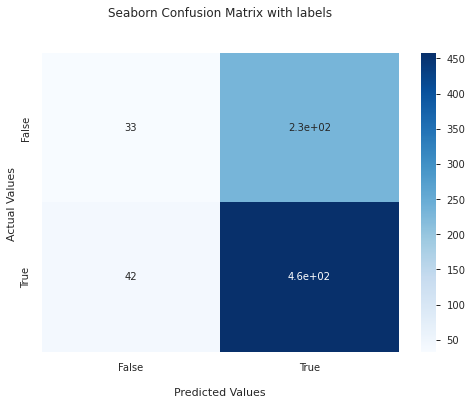

In [20]:
ax = sns.heatmap(df_confusion1, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [21]:
metrics1 = metrics(df_confusion1)

precision: 0.662807525325615
recall: 0.916
f_score: 0.7691015952980689
accuracy: 0.6409921671018277


In [22]:
y_actual2 = pd.Series(Y_test.to_numpy().flatten(), name='Actual')
y_predicted2 = pd.Series(Y_pred_ls_test.flatten(), name='Predicted')
df_confusion2 = pd.crosstab(y_actual2, y_predicted2)
df_confusion2

Predicted,0.0,1.0
Actual,,
0,5,61
1,9,116


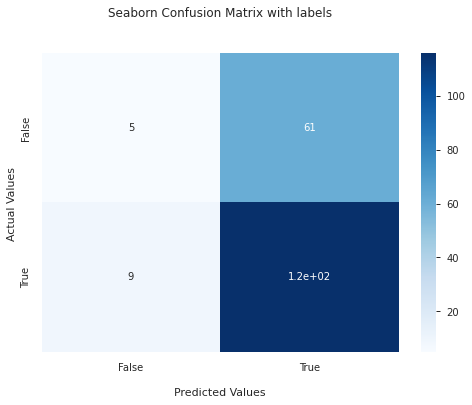

In [23]:
ax = sns.heatmap(df_confusion2, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [24]:
metrics2 = metrics(df_confusion2)

precision: 0.655367231638418
recall: 0.928
f_score: 0.7682119205298013
accuracy: 0.6335078534031413


# The Fisher's Linear Discrimination Method


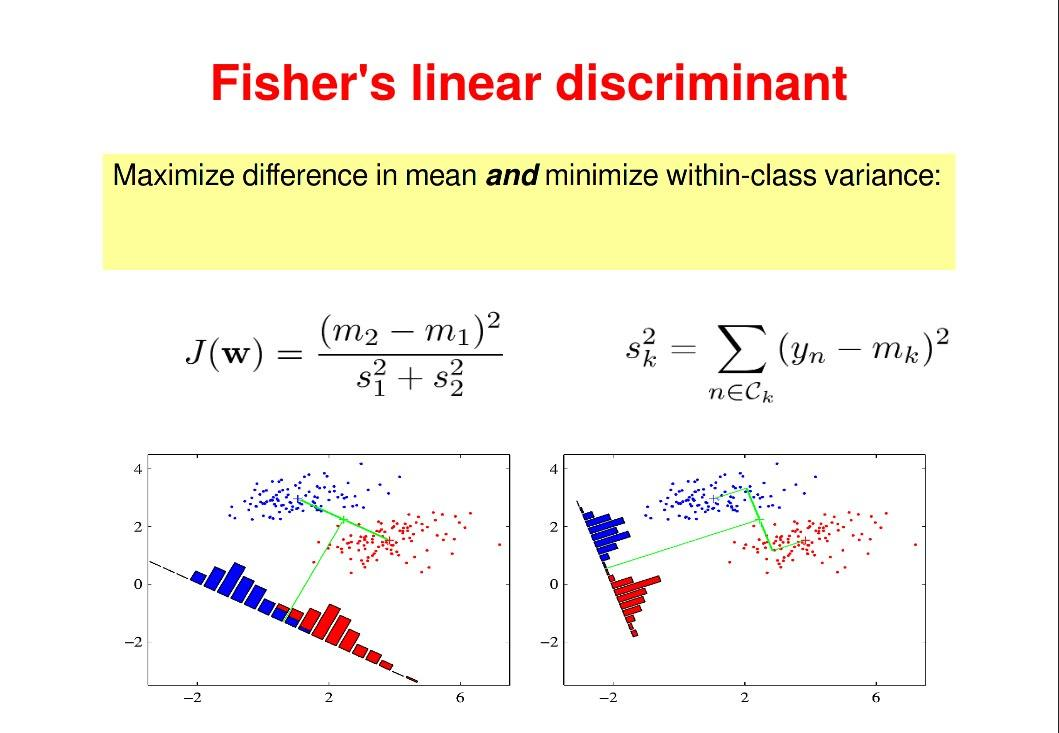

In [25]:
'''
#Sw1 = np.dot((train_set[train_set.positive == 1].iloc[:,1:] - m1).T, (train_set[train_set.positive == 1].iloc[:,1:] - m1)) 
#Sw2 = np.dot((train_set[train_set.positive == 0].iloc[:,1:] - m1).T, (train_set[train_set.positive == 0].iloc[:,1:] - m1))
#Sw = Sw1 + Sw2
#Sw.shape
m1 = sum(train_set[train_set.positive == 1].iloc[:,1:].values) / train_set[train_set.positive == 1].shape[0]
m0 = sum(train_set[train_set.positive == 0].iloc[:,1:].values) / train_set[train_set.positive == 0].shape[0]

Sw1 = np.dot((train_set[train_set.positive == 1].iloc[:,1:] - m1).T, (train_set[train_set.positive == 1].iloc[:,1:] - m1)) 
Sw0 = np.dot((train_set[train_set.positive == 0].iloc[:,1:] - m0).T, (train_set[train_set.positive == 0].iloc[:,1:] - m0))
Sw = Sw1 + Sw0
Sb = np.outer((m1-m0),(m1-m0).T)
A = np.dot(np.linalg.pinv(Sw),Sb)
vals, vects = np.linalg.eig(A)
eiglist = [(vals[i], vects[:,i]) for i in range(len(vals))] 
eiglist = sorted(eiglist, key = lambda x : x[0], reverse = True)
w = np.array([eiglist[i][1] for i in range(30)])


#mat = np.dot(np.linalg.pinv(self.SW),self.SB)
#eigvals, eigvecs = np.linalg.eig(mat)

eiglist = [(vals[i], vects[:,i]) for i in range(len(vals))] 
eiglist = sorted(eiglist, key = lambda x : x[0], reverse = True)
w = np.array([eiglist[i][1] for i in range(30)])
#eiglist = [(eigvals[i], eigvecs[:, i]) for i in range(len(eigvals))]
#eiglist = sorted(eiglist, key = lambda x : x[0], reverse = True)
#w = np.array([eiglist[i][1] for i in range(self.num_dim)])
#self.w=w

#vects[0].shape
vects[:, :2].shape
W = vects[:, :3]
X_trafo = np.dot(X_train, W)
tot_trafo = pd.concat([pd.DataFrame(X_trafo, index=range(len(X_trafo))), Y_train], 1)

#vals=np.array(self.transformed_grouped_data[i])
#self.class_values[i]['mean']=vals.mean()
#self.class_values[i]['std']=vals.std()


#a=self.class_values[0]['std']**2 - self.class_values[1]['std']**2

#b=-2*(((self.class_values[0]['std']**2)*self.class_values[1]['mean'])-((self.class_values[1]['std']**2)*self.class_values[0]['mean']))
#c=((self.class_values[0]['std']**2)*(self.class_values[1]['mean']**2))-((self.class_values[1]['std']**2)*(self.class_values[0]['mean']**2))-2*((self.class_values[0]['std']*self.class_values[1]['std'])**2)*(np.log((self.class_values[0]['std'])/(self.class_values[1]['std'])))

S2 = tot_trafo[tot_trafo.positive == 1].iloc[:,:-1].values.std()
S1 = tot_trafo[tot_trafo.positive == 0].iloc[:,:-1].values.std()
miu2 = tot_trafo[tot_trafo.positive == 1].iloc[:,:-1].values.mean()
miu1 = tot_trafo[tot_trafo.positive == 0].iloc[:,:-1].values.mean()
a = S1**2 - S2**2 
b = -2 * ((S1**2 *miu2)-(S2**2*miu1)) 
c = (S1**2 * miu2**2) - (S2**2 * miu1**2) - (2*(S1*(S2**2)* np.log(S1/S2)))
dis=(b**2)-(4*a*c)
dis=dis**(1/2)
x1=((-b)+dis)/(2*a)
x2=((-b)-dis)/(2*a)'''


"\n#Sw1 = np.dot((train_set[train_set.positive == 1].iloc[:,1:] - m1).T, (train_set[train_set.positive == 1].iloc[:,1:] - m1)) \n#Sw2 = np.dot((train_set[train_set.positive == 0].iloc[:,1:] - m1).T, (train_set[train_set.positive == 0].iloc[:,1:] - m1))\n#Sw = Sw1 + Sw2\n#Sw.shape\nm1 = sum(train_set[train_set.positive == 1].iloc[:,1:].values) / train_set[train_set.positive == 1].shape[0]\nm0 = sum(train_set[train_set.positive == 0].iloc[:,1:].values) / train_set[train_set.positive == 0].shape[0]\n\nSw1 = np.dot((train_set[train_set.positive == 1].iloc[:,1:] - m1).T, (train_set[train_set.positive == 1].iloc[:,1:] - m1)) \nSw0 = np.dot((train_set[train_set.positive == 0].iloc[:,1:] - m0).T, (train_set[train_set.positive == 0].iloc[:,1:] - m0))\nSw = Sw1 + Sw0\nSb = np.outer((m1-m0),(m1-m0).T)\nA = np.dot(np.linalg.pinv(Sw),Sb)\nvals, vects = np.linalg.eig(A)\neiglist = [(vals[i], vects[:,i]) for i in range(len(vals))] \neiglist = sorted(eiglist, key = lambda x : x[0], reverse = True)\nw 

In [26]:
def train(train_set, i):
    m1 = sum(train_set[train_set.positive == 1].iloc[:,1:].values) / train_set[train_set.positive == 1].shape[0]
    m0 = sum(train_set[train_set.positive == 0].iloc[:,1:].values) / train_set[train_set.positive == 0].shape[0]

    Sw1 = np.dot((train_set[train_set.positive == 1].iloc[:,1:] - m1).T, (train_set[train_set.positive == 1].iloc[:,1:] - m1)) 
    Sw0 = np.dot((train_set[train_set.positive == 0].iloc[:,1:] - m0).T, (train_set[train_set.positive == 0].iloc[:,1:] - m0))
    Sw = Sw1 + Sw0
    Sb = np.outer((m1-m0),(m1-m0).T)
    A = np.dot(np.linalg.pinv(Sw),Sb)
    vals, vects = np.linalg.eig(A)
    w = vects[:, :i]
    
    return w

In [27]:
#Incomplete

def pred_f_ld(X, Y_train, W):
    X_trafo = np.dot(X, W)
    tot_trafo = pd.concat([pd.DataFrame(X_trafo, index=range(len(X_trafo))), Y_train], 1)
    S2 = tot_trafo[tot_trafo.positive == 1].iloc[:,:-1].values.std()
    S1 = tot_trafo[tot_trafo.positive == 0].iloc[:,:-1].values.std()
    miu2 = tot_trafo[tot_trafo.positive == 1].iloc[:,:-1].values.mean()
    miu1 = tot_trafo[tot_trafo.positive == 0].iloc[:,:-1].values.mean()
    a = S1**2 - S2**2 
    b = -2 * ((S1**2 *miu2)-(S2**2*miu1)) 
    c = (S1**2 * miu2**2) - (S2**2 * miu1**2) - (2*(S1*(S2**2)* np.log(S1/S2)))
    dis=(b**2)-(4*a*c)
    dis=dis**(1/2)
    x1=((-b)+dis)/(2*a)
    x2=((-b)-dis)/(2*a)

    return 1

# The Linear Perceptron Method

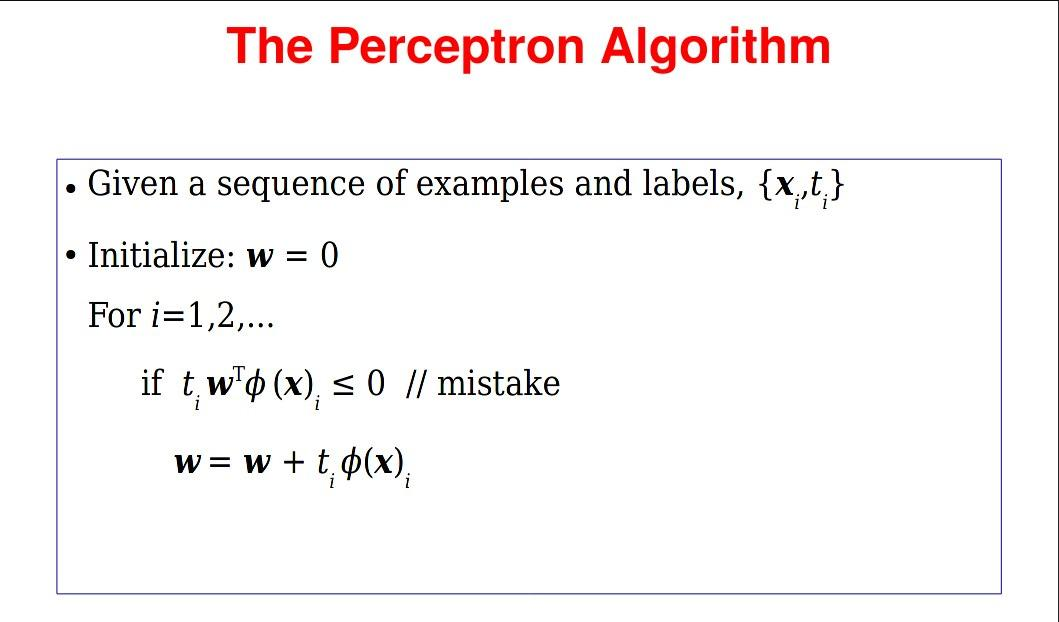

In [28]:
def step_func(z):
        return 1.0 if (z > 0) else 0.0

In [29]:
def perceptron(X, y, lr, epochs):
    n, d = X.shape
    theta = np.zeros((d+1,1))
    n_miss_list = []
    for epoch in range(epochs):
        n_miss = 0
        for idx, x_i in enumerate(X.values):
            x_i = np.concatenate(([1],x_i)).reshape(-1,1)
            y_hat = step_func(np.dot(x_i.T, theta))
            # Updating if the example is misclassified.
            if (np.squeeze(y_hat) - np.squeeze(y.iloc[idx].to_numpy())) != 0:
                theta = np.add(theta, x_i* float(lr*((y.iloc[idx] - y_hat))))
                # adding by 1.
                n_miss = n_miss + 1
        
        # adding number of misclassified examlpes in every iteration.
        n_miss_list.append(n_miss)
        
    return theta, n_miss_list

In [30]:
def pred_pa(X, theta):

    n,d = X.shape
    X2 = np.concatenate((np.ones((n,1)), X.copy(deep = True)), axis = 1)
    thetaTx = np.dot(X2, theta)
    Y_pred_pa = np.array([step_func(xi) for xi in thetaTx]).reshape((-1,1))
    return Y_pred_pa

In [31]:
# predicting response for both train and test set
theta, miss_l = perceptron(X_train, Y_train, 0.5, 100)

Y_pred_pa_train = pred_pa(X_train,theta)
Y_pred_pa_test = pred_pa(X_test,theta)

In [32]:
#0.01, 0.02, 0.05,
#50, 
lrs = [ 0.10, 0.20]
epochs = [100, 150]
acc_tr_pa = []
acc_ts_pa = []
for lr in lrs:
    for epoch in epochs:
        theta = perceptron(X_train, Y_train, lr, epoch)[0]
        y_hat_train = pred_pa(X_train,theta)
        y_hat_test = pred_pa(X_test,theta)
        print('accuracy for train set',lr, 'as a learning rate and', epoch, 'as the number of epochs is',
              float((y_hat_train == Y_train).sum()/Y_train.shape[0]))
        acc_tr_pa.append(float((y_hat_train == Y_train).sum()/Y_train.shape[0]))
        print('accuracy for test set',lr, 'as a learning rate and', epoch, 'as the number of epochs is',
              float((y_hat_test == Y_test).sum()/Y_test.shape[0]))
        acc_ts_pa.append(float((y_hat_test == Y_test).sum()/Y_test.shape[0]))
        print('-'*90)

accuracy for train set 0.1 as a learning rate and 100 as the number of epochs is 0.9595300261096605
accuracy for test set 0.1 as a learning rate and 100 as the number of epochs is 0.9528795811518325
------------------------------------------------------------------------------------------
accuracy for train set 0.1 as a learning rate and 150 as the number of epochs is 0.9673629242819843
accuracy for test set 0.1 as a learning rate and 150 as the number of epochs is 0.9581151832460733
------------------------------------------------------------------------------------------
accuracy for train set 0.2 as a learning rate and 100 as the number of epochs is 0.9595300261096605
accuracy for test set 0.2 as a learning rate and 100 as the number of epochs is 0.9528795811518325
------------------------------------------------------------------------------------------
accuracy for train set 0.2 as a learning rate and 150 as the number of epochs is 0.9673629242819843
accuracy for test set 0.2 as a

In [33]:
print(acc_tr_pa)
print(acc_ts_pa)

[0.9595300261096605, 0.9673629242819843, 0.9595300261096605, 0.9673629242819843]
[0.9528795811518325, 0.9581151832460733, 0.9528795811518325, 0.9581151832460733]


In [34]:
y_actu3 = pd.Series(Y_train.to_numpy().flatten(), name='Actual')
y_pred3 = pd.Series(Y_pred_pa_train.flatten(), name='Predicted')
df_confusion3 = pd.crosstab(y_actu3, y_pred3)
df_confusion3

Predicted,0.0,1.0
Actual,,
0,264,2
1,27,473


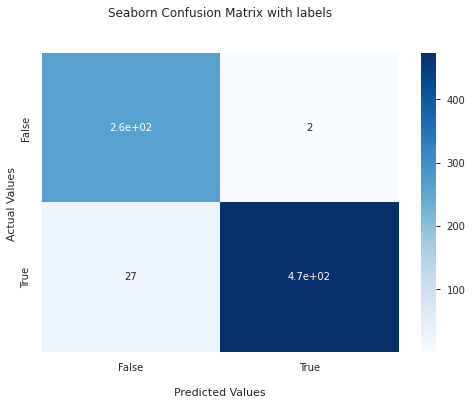

In [35]:
ax = sns.heatmap(df_confusion3, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [36]:
metrics3 = metrics(df_confusion3)

precision: 0.9957894736842106
recall: 0.946
f_score: 0.9702564102564103
accuracy: 0.9621409921671018


In [37]:
y_actu4 = pd.Series(Y_test.to_numpy().flatten(), name='Actual')
y_pred4 = pd.Series(Y_pred_pa_test.flatten(), name='Predicted')
df_confusion4 = pd.crosstab(y_actu4, y_pred4)
df_confusion4

Predicted,0.0,1.0
Actual,,
0,64,2
1,9,116


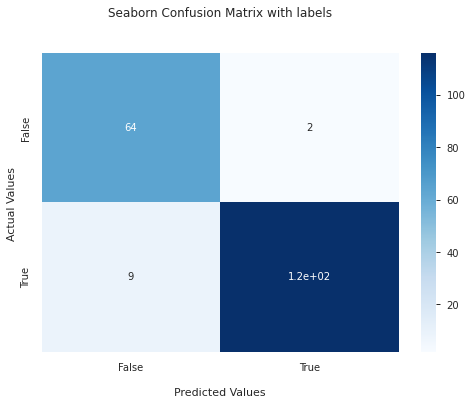

In [38]:
ax = sns.heatmap(df_confusion4, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [39]:
metrics4 = metrics(df_confusion4)

precision: 0.9830508474576272
recall: 0.928
f_score: 0.9547325102880659
accuracy: 0.9424083769633508


# The Logistic Regression Method

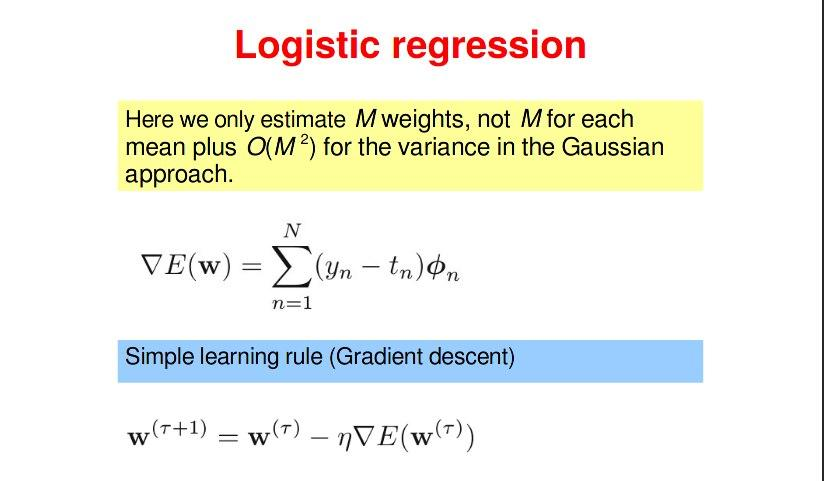

In [40]:
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

In [41]:
def loss(y, y_hat):
    loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
    return loss

In [42]:
def gradients(X, y, y_hat):
    m = X.shape[0]
    
    # Gradient of loss w.r.t weights.
    dw = (1/m)*np.dot(X.T, (y_hat - y))
    
    # Gradient of loss w.r.t bias.
    db = (1/m)*np.sum((y_hat - y)) 
    
    return dw, db

In [43]:
def train(X, y, bs, epochs, lr):
    
    # bs: batch size
    
    n, d = X.shape
    # Initializing weights and bias to zeros.
    w = np.zeros((d,1))
    b = 0
    
    # Reshaping y.
    y = y.to_numpy().reshape(-1,1)
        
    # Empty list to store losses.
    losses = []
    
    # Training loop.
    for epoch in range(epochs):
        for i in range((n-1)//bs + 1):
            
            # Defining batches. SGD.
            start_i = i*bs
            end_i = start_i + bs
            xb = X.values[start_i:end_i]
            yb = y[start_i:end_i]
            
            # Calculating hypothesis/prediction.
            y_hat = sigmoid(np.dot(xb, w) + b)
            
            # Getting the gradients of loss w.r.t parameters.
            dw, db = gradients(xb, yb, y_hat)
            
            # Updating the parameters.
            w -= lr*dw
            b -= lr*db
        
        # Calculating loss and appending it in the list.
        l = loss(y, sigmoid(np.dot(X, w) + b))
        losses.append(l)
        
    # returning weights, bias and losses(List).
    return w, b, losses

In [44]:
def pred_lr(X,w,b):
    
    preds = sigmoid(np.dot(X, w) + b)
    pred_class = []
    pred_class = [1 if i > 0.5 else 0 for i in preds]
    
    return np.array(pred_class)

In [45]:
w, b, l = train(X_train, Y_train, bs=125, epochs=100, lr=0.01)

Y_pred_lr_train = pred_lr(X_train,w,b)
Y_pred_lr_test = pred_lr(X_test,w,b)

In [46]:
lrs = [0.005, 0.01, 0.05, 0.1]
epochs = [100, 150, 200]
acc_tr_lr = []
acc_ts_lr = []
for lr in lrs:
    for epoch in epochs:
        w, b, l = train(X_train, Y_train, 125, epoch, lr)
        y_hat_train = pred_lr(X_train,w,b).reshape((-1,1))
        y_hat_test = pred_lr(X_test,w,b).reshape((-1,1))
        print('accuracy for train set',lr, 'as a learning rate and', epoch, 'as the number of epochs is',
              float((y_hat_train == Y_train).sum()/Y_train.shape[0]))
        acc_tr_lr.append(float((y_hat_train == Y_train).sum()/Y_train.shape[0]))
        print('accuracy for test set',lr, 'as a learning rate and', epoch, 'as the number of epochs is',
              float((y_hat_test == Y_test).sum()/Y_test.shape[0]))
        acc_ts_lr.append(float((y_hat_test == Y_test).sum()/Y_test.shape[0]))
        print('-'*90)

accuracy for train set 0.005 as a learning rate and 100 as the number of epochs is 0.7571801566579635
accuracy for test set 0.005 as a learning rate and 100 as the number of epochs is 0.7277486910994765
------------------------------------------------------------------------------------------
accuracy for train set 0.005 as a learning rate and 150 as the number of epochs is 0.8120104438642297
accuracy for test set 0.005 as a learning rate and 150 as the number of epochs is 0.7591623036649214
------------------------------------------------------------------------------------------
accuracy for train set 0.005 as a learning rate and 200 as the number of epochs is 0.8407310704960835
accuracy for test set 0.005 as a learning rate and 200 as the number of epochs is 0.7958115183246073
------------------------------------------------------------------------------------------
accuracy for train set 0.01 as a learning rate and 100 as the number of epochs is 0.8407310704960835
accuracy for test

In [47]:
acc_tr_lr = [round(float(i), 3) for i in acc_tr_lr]
acc_ts_lr = [round(float(i), 3) for i in acc_ts_lr]
print(acc_tr_lr)
print(acc_ts_lr)

[0.757, 0.812, 0.841, 0.841, 0.879, 0.91, 0.98, 0.984, 0.984, 0.984, 0.984, 0.984]
[0.728, 0.759, 0.796, 0.796, 0.822, 0.864, 0.979, 0.979, 0.979, 0.979, 0.979, 0.979]


In [48]:
y_actu5 = pd.Series(Y_train.to_numpy().flatten(), name='Actual')
y_pred5 = pd.Series(Y_pred_lr_train.flatten(), name='Predicted')
df_confusion5 = pd.crosstab(y_actu5, y_pred5)
df_confusion5

Predicted,0,1
Actual,,
0,156,110
1,12,488


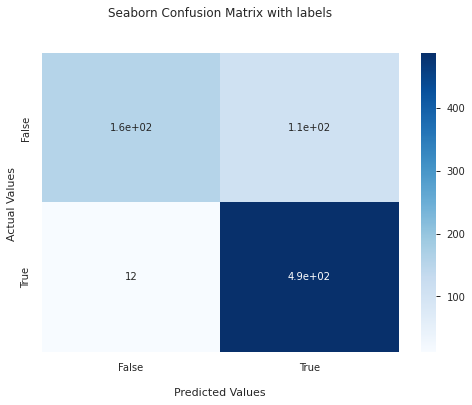

In [49]:
ax = sns.heatmap(df_confusion5, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [50]:
metrics5 = metrics(df_confusion5)

precision: 0.8160535117056856
recall: 0.976
f_score: 0.888888888888889
accuracy: 0.8407310704960835


In [51]:
y_actu6 = pd.Series(Y_test.to_numpy().flatten(), name='Actual')
y_pred6 = pd.Series(Y_pred_lr_test.flatten(), name='Predicted')
df_confusion6 = pd.crosstab(y_actu6, y_pred6)   
df_confusion6

Predicted,0,1
Actual,,
0,28,38
1,1,124


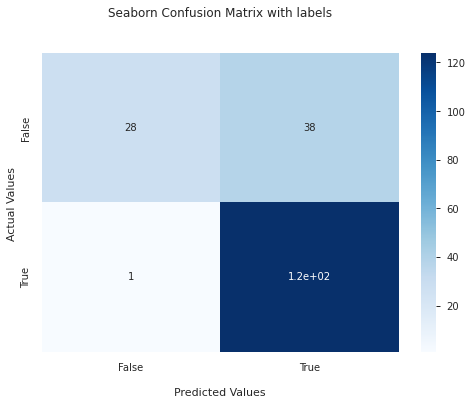

In [52]:
ax = sns.heatmap(df_confusion6, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [53]:
metrics6 = metrics(df_confusion6)

precision: 0.7654320987654321
recall: 0.992
f_score: 0.8641114982578397
accuracy: 0.7958115183246073
